<a href="https://colab.research.google.com/github/saptarshimazumdar/deep-learning-concepts/blob/main/generic/loss-functions-comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programming Question:** Implement Loss Functions from Scratch
In this question, you will implement basic loss functions used in machine learning using NumPy only. Do not use any machine learning libraries.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(a) **Mean Squared Error (MSE)**

Write a Python function that computes the Mean Squared Error loss given:
* True labels y
* Predicted values yˆ

In [ ]:
def mean_squared_error(y: np.ndarray, _y: np.ndarray):
  return np.mean((y - _y) ** 2)


original = np.linspace(-10, 10, 100)
noise = np.random.normal(0, 0.1, 100)
noisy_data = original + noise
mse = mean_squared_error(original, noisy_data)

print("Mean Squared Error: ", mse)

Mean Squared Error:  0.012770425996294773


(b) **Binary Cross-Entropy Loss**

Write a Python function that computes the Binary Cross-Entropy loss for a binary
classification task given:
* True labels y ∈ {0, 1}
* Predicted probabilities yˆ ∈ (0, 1)

In [ ]:
def binary_cross_entropy_loss(y: np.ndarray, _y: np.ndarray, _tolerance=1e-15):
  _y = np.clip(noisy_data, _tolerance, 1-_tolerance)
  return np.sum((y * np.log(_y)) + (1 - y) * np.log(1 - _y))

original = np.linspace(0, 1, 100)
noise = np.random.normal(0, 0.01, 100)
noisy_data = original + noise
bce = binary_cross_entropy_loss(original, noisy_data)

print("Binary Cross-Entropy Loss: ", bce)

Binary Cross-Entropy Loss:  -49.516846567101766


**Numerical Stability**

Explain briefly why it is important to clip predicted probabilities when computing cross-entropy loss.

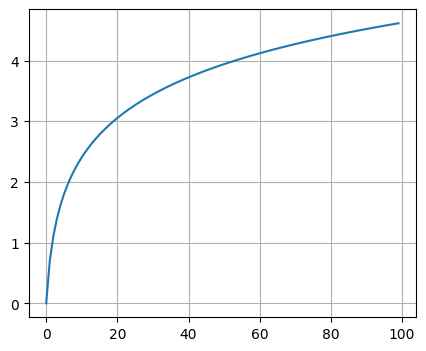

In [ ]:
plt.figure(figsize=(5,4))
sns.lineplot(x=range(100), y=np.log(np.linspace(1, 101, 100)))
plt.grid()
plt.show()

In [ ]:

np.log(0)

/tmp/ipython-input-2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [ ]:
np.log(-1+0j)

np.complex128(3.141592653589793j)

***Explaination***

Cross-Entropy Loss uses logarithm.

For log:

* `log(n)∈ ℂ : n ∈ (-inf, 0)`
* `{log(n) = -inf : n = 0}`

The `(-inf, 0)` space becomes useless for Binary Cross-Entropy Loss calculation. Hence, data is clipped in a specific range
